In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel, wilcoxon, norm, shapiro, mannwhitneyu, skew
from scipy.ndimage import sobel
from scipy.misc import ascent
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from pingouin import multivariate_normality

## Multiple Choice

1. (a)
2. (a)
3. (d)
4. (e)
5. (c)

## Short-Answer
6. 
(a) $$
        sensitivity = {N_{D,+} \over N_{D,+} + N_{D,-}}\\
        specificity = {N_{H,-} \over N_{H,-} + N_{H,+}}
    $$

(b) $N_{D,-}=2, N_{D,+}=20-2=18, N_{H,+}=3, N_{H,-}=20-3=17$
    $$
        sensitivity={N_{D,+} \over N_{D,+} + N_{D,-}}={18 \over 18+2}=0.90\\
        specificity={N_{H,-} \over N_{H,-} + N_{H,+}}={17 \over 17+3}=0.85
    $$
(c) $$
        PPV={N_{D,+} \over N_{D,+} + N_{H,+}}={18 \over 18+3}=0.86\\
        NPV={N_{H,-} \over N_{D,-} + N_{H,-}}={17 \over 17+2}=0.89
    $$
(d)
- Sensitivity vs PPV: sensitivity measures the proportion of real postive cases that are identified positively by the test while PPV measures the proportion of positively identified cases that are truly positive.
- Specificity vs NPV: specificity measures the proportion of real negative cases that are identified correctly by the test as negative results while NPV measures the proportion of negatively identified cases that are truly negative.
7. 
I do not agree with Sarah's reasoning. Under the assumption that the significance level is 0.05, we will reject the null hypothesis that there is no significant difference between the Drug X and Drug Y which means the result is significant since the p value (0.02) she got is less than the significance level. But for the significance level of 0.01, we will fail to reject the null hypothesis and the result is not statistically significant. Therefore Sarah's conclusion is depending on which criteria she will choose. In general case, the significance level should be made before conducting the experiment and the statistical conclusion should dependend on the result of the research experiment. Here, Sarah made the significance level as 0.01 and she should compare the result with 0.01 instead of 0.05. As a result, the null hypothesis is failed to reject and the result is not statistically significant.

8. 
- Clinical deployment and patient care
    - The diagnosis by the overfitted on patients will be incorrected with high probability, since the model is overfitting and has bad performance on test datasets. This may result in inappropriate treatments and indeed cause more pain or discomfort.
    - Due to inaccurate prediction of the model, the hospital may conduct some uncessary examinations, procedures and medications, which will not only bring inconvenience to the patient, but also increase cost of both patient and hospital.
- The clinicians should not rely on the performance of the model based only on the train dataset. Since the model is overfitting that means the model summarized the training data well instead of learning the general pattern of the data. Trusting solely on the overfitting model may result in low generalization on the unseen patients. 
9. 
- Linearity
    - Assumption: the model should has linear relationship between the outcome variables and independent variables.
    - Importance: the linear regression model is designed to capture the linear relationship between the variables. If it does not have the liearity, the definition is not obeyed.
- Homoscedasticity
    - Assumption: the residuals of the multiple dimensions must have equal variance.
    - Importance: non-constant residuals may result in bad estimation on the performance of the model coefficients and it has effects on the hypothesis tests.
- Residuals Normality
    - Assumption: the residuals of the linear regression model should be normally distributed.
    - Importance: the normally distributed residuals can support the valid hypothesis tests. Unnormal residuals may result in incorrect hypothesis test and indeed has inaccurate p values.
- Independent Residuals
    - Assumption: the residuals of the linear regression model should be independent and there is no autocorrelation of residuals.
    - Importance: the independent residuals allows for the valid hypothesis tests. Dependent residuals may result in biased parameter estimations and low reliability of statistical predictions.
10. 
(a) We can utilize the properties of the normal distribution and $X \sim N(\mu, \sigma)$, if
    $$ 
        Y = aX + b \rightarrow Y \sim N(a\mu+b, a^{2}\sigma^{2})
    $$ Therefore, we can prove that
    $$
        Z = {(X - \mu) \over \sigma} \sim N({\mu - \mu \over \sigma}, {1 \over \sigma^{2}} * \sigma^{2}) = N(0, 1)
    $$
(b) We can utilize the properties of the normal distribution and $X_{1} \sim N(\mu_{1}, \sigma_{1})$, $X_{2} \sim N(\mu_{2}, \sigma_{2})$, if
    $$
        Y = X_{1}X_{2} \rightarrow Y \sim N(\mu_{1}\mu_{2}, \sigma_{1}^{2}\mu_{2}^{2}+\sigma_{2}^{2}\mu_{1}^{2})
    $$ Therefore, we can prove that
    $$
        XZ \sim N(\mu\times0, \sigma^{2}\times0+1^{2}\times\mu^{2}) = N(0, \mu^{2})
    $$

## Data Analysis
### Q11

In [4]:
np.random.seed(2)
X = np.random.gamma(1, 5, 1000)
Y = np.random.poisson(lam=5, size=1000)

- (a) Histogram Plots\
**The gamma distribution X is not normally distributed** but **the poisson distribution Y is normal** upon visual inspection.

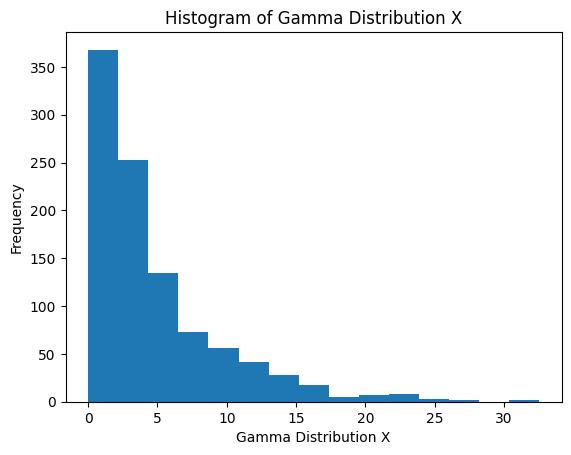

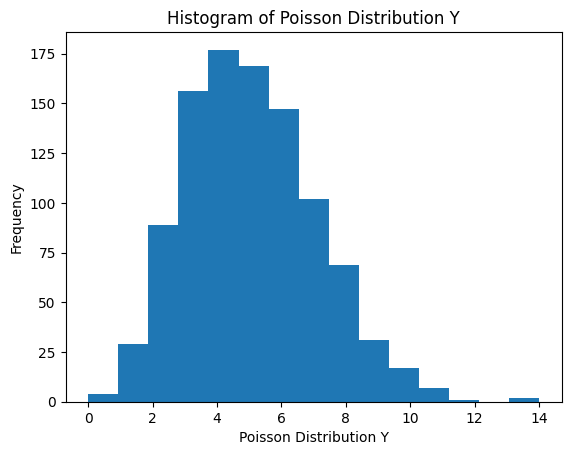

In [5]:
_,_,_ = plt.hist(X, bins=15)
plt.xlabel('Gamma Distribution X')
plt.ylabel('Frequency')
plt.title('Histogram of Gamma Distribution X')
plt.show()

_,_,_ = plt.hist(Y, bins=15)
plt.xlabel('Poisson Distribution Y')
plt.ylabel('Frequency')
plt.title('Histogram of Poisson Distribution Y')
plt.show()

- (b) ECDF Plots\
**The gamma distribution X is not visually normal** but **poisson distribution Y is visually normal** compared to the ECDF plot of the theoretical CDF functions from normal distribution.

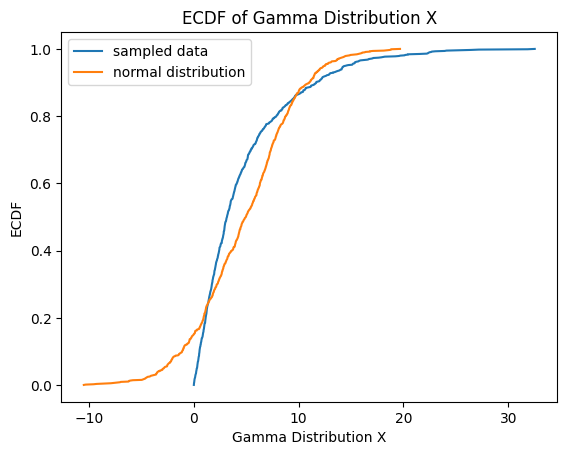

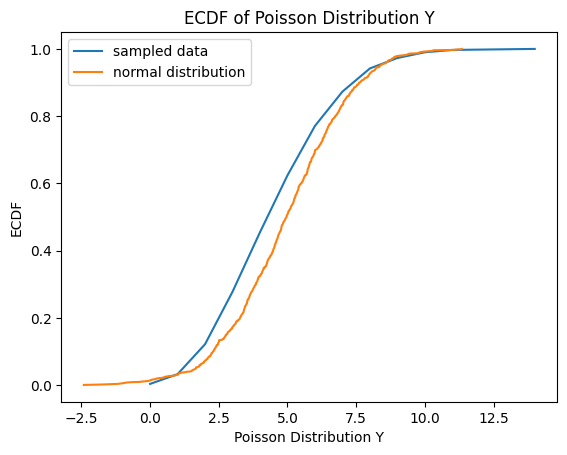

In [7]:
# Note: adaption from my Assignment 1
def ECDF(Y):
    """
    Function to calculate ECDF of an array Y
    """
    x = np.array(Y, copy=True)
    # sort Y
    x.sort()
    
    # get frequency
    x, count = np.unique(x, return_counts=True)
    
    # calculate PMF
    pmf = count / np.sum(count)
    
    # calculate ECDF
    y = np.cumsum(pmf)
    
    return x, y
    # return (x, y) components of ECDF

mean_X = np.mean(X)
std_X = np.std(X)

mean_Y = np.mean(Y)
std_Y = np.std(Y)

norm_X = np.random.normal(mean_X, std_X, size=1000)
norm_Y = np.random.normal(mean_Y, std_Y, size=1000)

normX_x, normX_y = ECDF(norm_X)
normY_x, normY_y = ECDF(norm_Y)

ecdfX_x, ecdfX_y = ECDF(X)
ecdfY_x, ecdfY_y = ECDF(Y)
_ = plt.plot(ecdfX_x, ecdfX_y)
_ = plt.plot(normX_x, normX_y)
plt.xlabel('Gamma Distribution X')
plt.ylabel('ECDF')
plt.legend(['sampled data', 'normal distribution'])
plt.title('ECDF of Gamma Distribution X')
plt.show()
_ = plt.plot(ecdfY_x, ecdfY_y)
_ = plt.plot(normY_x, normY_y)
plt.xlabel('Poisson Distribution Y')
plt.ylabel('ECDF')
plt.legend(['sampled data', 'normal distribution'])
plt.title('ECDF of Poisson Distribution Y')
plt.show()

- (c) Statistical Tests\
I plan to use two-tailed **unpaired t-Test (parametric)** and **Mann-Whitney U-Test (non-parametric)** to evaluate whether or not X is significant distinct from Y. As far as I am thinking, **the non-parametric Mann-Whitney U-Test** is well suited to distinguish X from Y since distribution X and Y do not match the normality assumption and we cannot use the parametric test to evaluate the statistics between X and Y.

In [8]:
alpha = 0.05
_, un_p_value = ttest_ind(X, Y, alternative='two-sided')
if un_p_value < alpha:
    print("The unpaired t-Test suggests that X and Y are statistically distinct.")
else:
    print("The unpaired t-Test does not provide evidence that X and Y are statistically distinct.")
    
_, p_value = mannwhitneyu(X, Y, alternative='two-sided')
if p_value < alpha:
    print("The Mann-Whitney U-Test suggests that X and Y are statistically distinct.")
else:
    print("The Mann-Whitney U-Test does not provide evidence that X and Y are statistically distinct.")

The unpaired t-Test does not provide evidence that X and Y are statistically distinct.
The Mann-Whitney U-Test suggests that X and Y are statistically distinct.


### Q12

- (a) Random Sampling\
Since the mean and median of the x values and y values are closed, I think there is no apparent skewness in the data.

In [18]:
np.random.seed(2)
x = np.random.uniform(0, 1, 10000)
y = np.random.uniform(0, 1, 10000)
# Calculate the mean and median of x and y values
mean_x = np.mean(x)
median_x = np.median(x)
mean_y = np.mean(y)
median_y = np.median(y)

print("Mean x:", mean_x)
print("Median x:", median_x)
print("Mean y:", mean_y)
print("Median y:", median_y)
# skew_x = skew(x, bias=True)
# skew_y = skew(y, bias=True)
# print(f'Skewness of x and y values respectively: {skew_x}, {skew_y}')

Mean x: 0.49374362293834745
Median x: 0.48662206478942166
Mean y: 0.5039755497942467
Median y: 0.5102057656253587


- (b) Scatter Plot

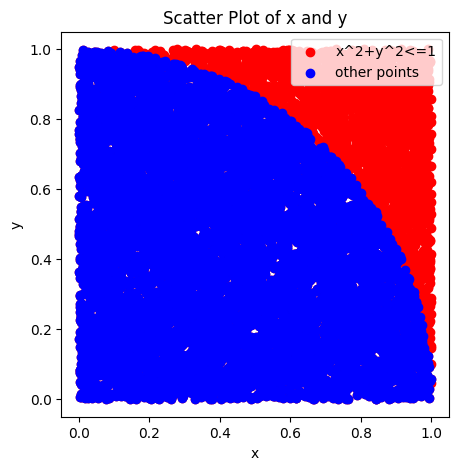

In [26]:
_,_ = plt.subplots(figsize=(5,5))
plt.scatter(x,y, color='red')
diff = 1 - x**2
select_y = y[diff >= y**2]
select_x = x[diff >= y**2]
plt.scatter(select_x, select_y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y')
plt.legend(['x^2+y^2<=1', 'other points'])
plt.show()

- (c) Calculate p and 4p

In [28]:
p = select_x.shape[0] / x.shape[0]
fourP = 4 * p
print(f'The value of p and 4*p respectively: {p}, {fourP}')

The value of p and 4*p respectively: 0.7859, 3.1436


- (d) Interpret p\
According to the results from 12c, the 4*p approximates the value of pi ($\pi$). The value p here represents the probability that randomly selecting a point from the square falls in a unit circle. Here I use the ratio of the area of the quarter of unit circle and that of the square to approximate the value of p.

### Q13

In [30]:
diabetes = load_diabetes(as_frame=True)
db = diabetes.data
db.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- (a) Determine Correlations\
From the plot, I can see that there is a positive correlation between age and bmi, age and bp, and bmi and bp.

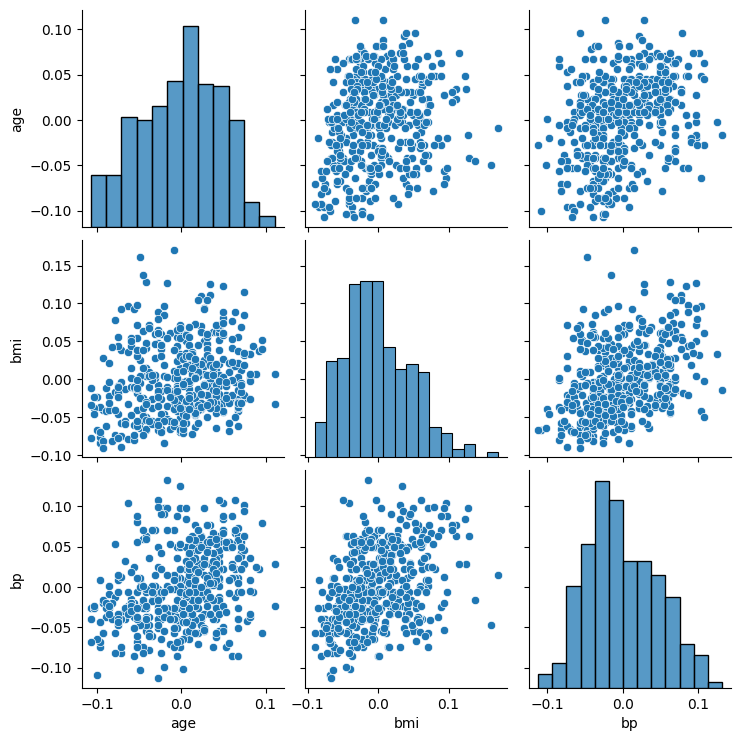

In [49]:
_ = sns.pairplot(db, vars=['age', 'bmi', 'bp'])

- (b) Linear Regression

In [50]:
independent_vars = ['age', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']
dependent_vars = ['bp']
model = LinearRegression().fit(db[independent_vars], db[dependent_vars])
R2 = model.score(db[independent_vars], db[dependent_vars])
print(f'R^2 value of this model: {R2}')

R^2 value of this model: 0.2895597118571953


- (c) Bar Plot\
In this problem, the interpretation of these coefficients weights relates to their signs. The positive weight of the feature shows that increasing in this feature gives increase in the dependent variable **bp** and the negative weight of the feature shows that increasing in this feature gives decrease in the dependent variable. In this case, the independent variable with larger absolute coefficient (higher positive or negative) has more predictive power in the model and here **bmi** has the highest positive coefficient which says it is the most powerful feature in the model. In the context, we cannot interpret any causality from the analysis since we cannot establish the relationship between the variables.

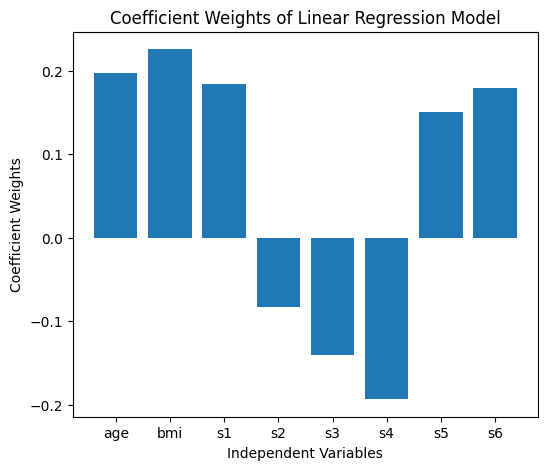

In [59]:
coeff = model.coef_
plt.figure(figsize=(6, 5))
plt.bar(independent_vars, coeff[0])
plt.xlabel("Independent Variables")
plt.ylabel("Coefficient Weights")
plt.title("Coefficient Weights of Linear Regression Model")
plt.show()

### Q14

- (a) PCA Model\


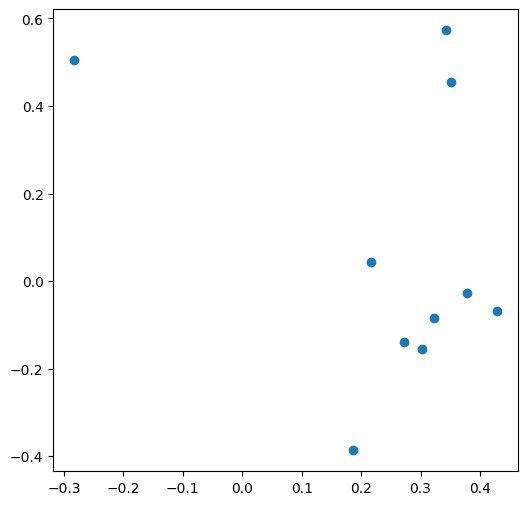

In [62]:
pca_model = PCA(n_components=10).fit(db)
components = pca_model.components_
plt.figure(figsize=(6, 6))
plt.scatter(components[0,:], components[1,:])
plt.show()

### Q15

In [5]:
img = ascent()